In [13]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import skimage.morphology
import skimage.feature
import math
from math import sqrt
from skimage.color import rgb2gray

(84, 512, 512)
uint16


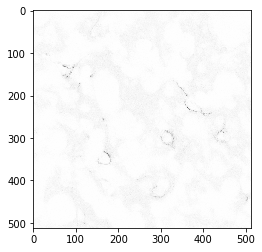

In [25]:
img = skimage.io.imread('slide_9_slice_2_60x_z_stack_2.tif')
print(img.shape)
print(img.dtype)
imgplot = plt.imshow(img[16, :, :], cmap='Greys')
plt.show()

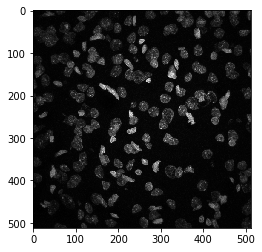

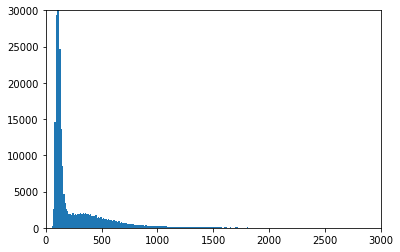

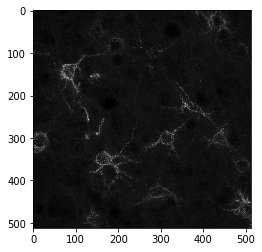

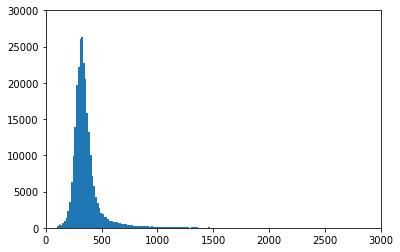

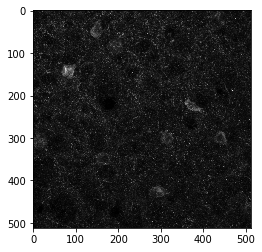

In [42]:
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

DAPI_MaxIP = np.max(DAPI,axis=0)
PNN_MaxIP = np.max(PNN,axis=0)
PVA_MaxIP = np.max(PVA,axis=0)


DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()
plt.hist(DAPI_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PNNplot = plt.imshow(1-PNN_MaxIP, cmap='Greys')
plt.show()
plt.hist(PNN_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PVAplot = plt.imshow(1-PVA_MaxIP, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11475bcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11992c198>], dtype=object))

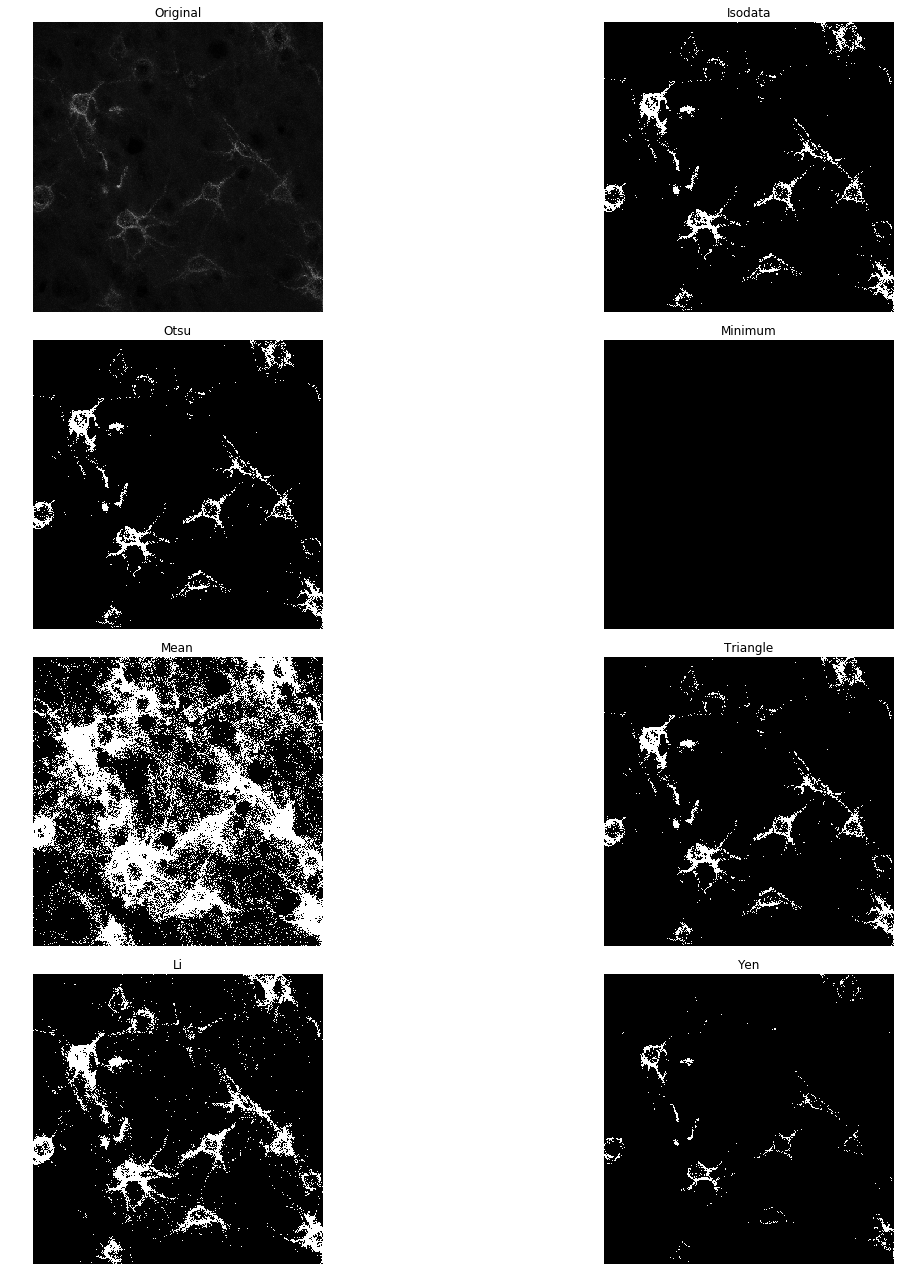

In [43]:
try_all_threshold(PNN_MaxIP, figsize=(20,18))

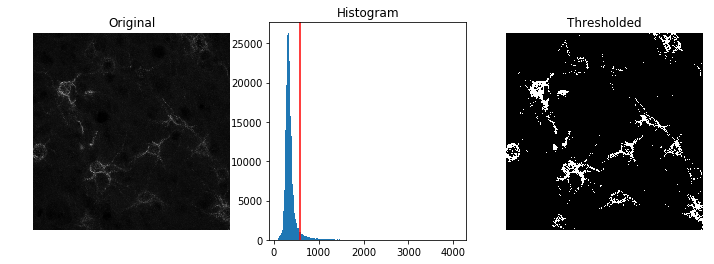

In [44]:
thresh = skimage.filters.threshold_triangle(PNN_MaxIP)
PNN_binary = PNN_MaxIP > thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(PNN_MaxIP, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(PNN_MaxIP.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(PNN_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

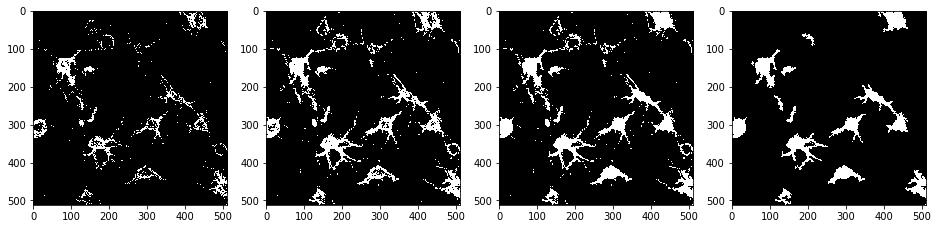

In [45]:
PNN_dilation = skimage.morphology.binary_dilation(PNN_binary)
PNN_filled_holes = ndi.binary_fill_holes(PNN_dilation)
PNN_clean = skimage.morphology.remove_small_objects(PNN_filled_holes, min_size=300)


fig, axes = plt.subplots(ncols=4, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(PNN_binary, cmap=plt.cm.gray)
ax[1].imshow(PNN_dilation, cmap=plt.cm.gray)
ax[2].imshow(PNN_filled_holes, cmap=plt.cm.gray)
ax[3].imshow(PNN_clean, cmap=plt.cm.gray)
plt.show()

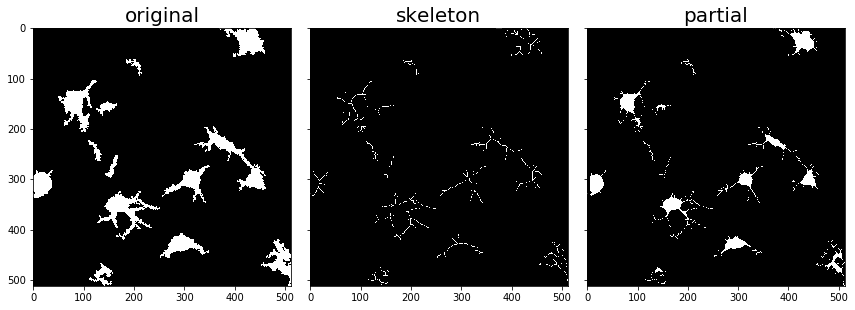

In [50]:
skeleton = skimage.morphology.skeletonize(PNN_clean)
partial_skel = skimage.morphology.thin(PNN_clean, max_iter=5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(PNN_clean, cmap=plt.cm.gray)
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton', fontsize=20)

ax[2].imshow(partial_skel, cmap=plt.cm.gray)
ax[2].set_title('partial', fontsize=20)

fig.tight_layout()
plt.show()

In [46]:
blobs = skimage.feature.blob_dog(PNN_clean)
blobs[:,2] = blobs[:,2]*sqrt(2)

In [37]:
print(blobs)

[[ 511.          137.           26.8435456 ]
 [ 469.          511.           42.94967296]
 [ 428.          292.           16.777216  ]
 [ 357.          176.           26.8435456 ]
 [ 310.            0.           26.8435456 ]
 [ 301.          315.           16.777216  ]
 [ 299.          441.           16.777216  ]
 [ 224.          366.           16.777216  ]
 [ 155.          147.           10.48576   ]
 [ 150.           87.           26.8435456 ]
 [   0.          424.           42.94967296]]


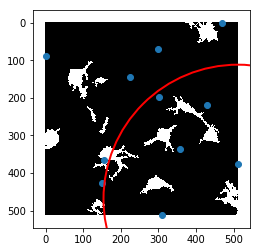

In [54]:
fig, axes = plt.subplots(ncols=1, figsize=(4, 4))
ax[0] = plt.subplot(1, 1, 1)
ax[0].imshow(PNN_clean, cmap=plt.cm.gray)
ax[0].scatter(blobs[:,0],512-blobs[:,1])
c = plt.Circle((blobs[0,0],blobs[1,0]),blobs[3,0], linewidth=2, color='r', fill=False)
ax[0].add_patch(c)
plt.show()

In [45]:
blobs[:,2] = blobs[:,2]*sqrt(2)